<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/doingmath02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

> Doing Math with Python: Use Programming to Explore Algebra, Statistics, Calculus, and More!  
> Amit Saha

を `Colab` でなぞりながら読む。

というプロジェクトの p. 149 あたり、Chapter 6 以降がこのファイルである。

6章 図形とフラクタル Drawing Geometric Shapes and Fractals  
7章 微積分 Solving Calculus Problems

の予定。

# 円を描く

最初に円を描く、として次のような例が載っている。 いままでの matplotlib の使い方とだいぶ違うので学び直し、位置付け、が必要な気がする。

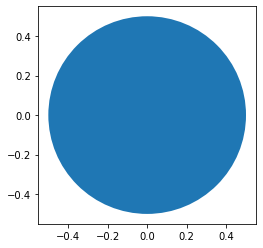

In [ ]:
import matplotlib.pyplot as plt


def create_circle():
    circle = plt.Circle((0, 0), radius=0.5)
    return circle


def show_shape(patch):
    ax = plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()


c = create_circle()
show_shape(c)


def を外して実験してみよう。

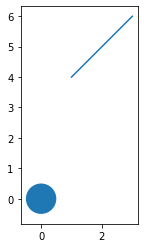

In [ ]:
import matplotlib.pyplot as plt


c = plt.Circle((0,0), radius=0.5)

fig = plt.figure()
ax = fig.add_subplot()

ax.add_patch(c)
ax.plot([1,2,3],[4,5,6])

ax.set_aspect('equal')
plt.show()

基本的に普通の pyplot で Circle とかの命令で図を描いて、add_patch で 追加して、plt.show すればいいみたい。


縦横比がおかしかったら

ax.set_aspect('equal')

とする、とのこと。

縁の色 edge color と塗りつぶしの色 face color (fill color) は fc='g'、 ec='r' のように指定する。 円以外にも楕円 Ellipse、多角形 Polygon、四辺形 Rectangle、などの patch がある。





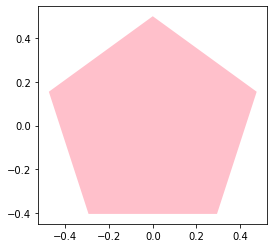

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, RegularPolygon

c = RegularPolygon((0, 0), radius=0.5, numVertices = 5, fc = 'pink')

fig = plt.figure()
ax = fig.add_subplot()

ax.add_patch(c)

ax.set_aspect('equal')
ax.axis('scaled')
plt.show()

# アニメーション

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

circle = plt.Circle((0, 0), radius=0.05)

def update_radius(i, circle):
    circle.radius = (i+1) * 0.5
    return circle

fig = plt.figure()
ax = fig.add_subplot(xlim=(-10, 10), ylim=(-10, 10))

ax.add_patch(circle)
anim = FuncAnimation(fig, update_radius, fargs=(circle,), frames=30, interval=200)

ax.set_aspect('equal')
plt.title('Simple Circle Animation')
plt.close()
from IPython.display import HTML
HTML(anim.to_jshtml())

発射物の軌道のアニメーション

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math


u = 5.0
theta = 60
theta = math.radians(theta)
g = 9.8

t_flight = 2*u*math.sin(theta)/g
intervals = []
start = 0
interval = 0.05
while start < t_flight:
    intervals.append(start)
    start = start + interval

xmin = 0
xmax = u*math.cos(theta)*intervals[-1]
ymin = 0
t_max = u*math.sin(theta)/g
ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2


def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*t*t
    circle.center = x, y
    return circle

circle = plt.Circle((xmin, ymin), radius = 0.05)    


fig = plt.figure()
ax = fig.add_subplot(xlim=(xmin-0.1, xmax+0.1), ylim=(ymin-0.1, ymax+0.1))

ax.add_patch(circle)
anim = FuncAnimation(fig, update_position, fargs=(circle, intervals, u, theta), frames=len(intervals), interval=100, repeat=False)

ax.set_aspect('equal')
ax.set_title('Projectile Motion')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.close()
from IPython.display import HTML
HTML(anim.to_jshtml())

# フラクタル fractal


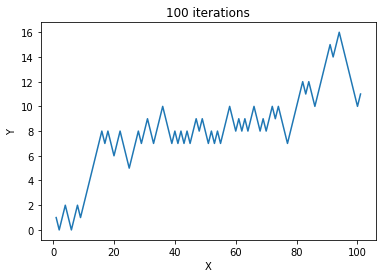

In [ ]:
import matplotlib.pyplot as plt
import random


def transformation_1(p):    
    x = p[0]    
    y = p[1]    
    return x + 1, y - 1

def transformation_2(p):    
    x = p[0]    
    y = p[1]    
    return x + 1, y + 1

def transform(p):
    transformations = [transformation_1, transformation_2] 
    t = random.choice(transformations)
    x, y = t(p)    
    return x, y


p = (1, 1)    
n = 100 # number of iterations
x = [p[0]]
y = [p[1]]
for i in range(n):
    p = transform(p)
    x.append(p[0])
    y.append(p[1])

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y)    
ax.set_title (str(n) + ' iterations')
ax.set_xlabel('X')    
ax.set_ylabel('Y')    
plt.show()

# バーンズリーのシダ Barnsley fern


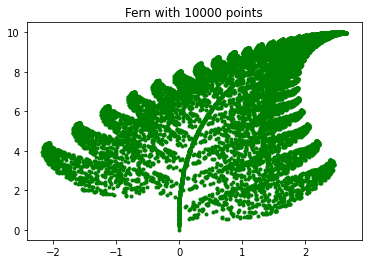

In [ ]:
# Barnsley Fern

import matplotlib.pyplot as plt
import random


def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.85*x + 0.04*y
    y1 = -0.04*x + 0.85*y + 1.6
    return x1, y1


def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.2*x - 0.26*y
    y1 = 0.23*x + 0.22*y + 1.6
    return x1, y1


def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = -0.15*x + 0.28*y
    y1 = 0.26*x + 0.24*y + 0.44
    return x1, y1


def transformation_4(p):
    x = p[0]
    y = p[1]
    x1 = 0
    y1 = 0.16*y
    return x1, y1


def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability) - 1


def transform(p):
    transformations = [transformation_1, transformation_2,
                       transformation_3, transformation_4]
    probability = [0.85, 0.07, 0.07, 0.01]
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y


n = 10000  # number of points in the fern
x = [0]
y = [0]
x1, y1 = 0, 0
for i in range(n):
    x1, y1 = transform((x1, y1))
    x.append(x1)
    y.append(y1)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y, 'og', markersize=3)
ax.set_title('Fern with {0} points'.format(n))
plt.show()


# 正方形 square

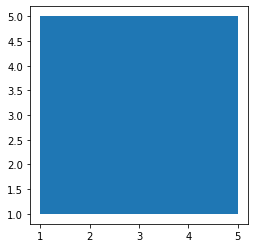

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, RegularPolygon, Rectangle
import math

# square = plt.Polygon([(1, 1), (5, 1), (5, 5), (1, 5)], closed = True)
# square = RegularPolygon((0, 0), radius=4, numVertices = 4, orientation=math.radians(45), fc = 'skyblue')
# square = Rectangle(xy=(0, 0), width=0.5, height=0.5, ec='#000000', fill=True)
square = Polygon([(1, 1), (5, 1), (5, 5), (1, 5)], closed = True)

fig = plt.figure()
ax = fig.add_subplot()

ax.add_patch(square)
ax.set_aspect('equal')
ax.axis('scaled')
plt.show()


matplotlib.pyplotにも多少の図形関数、 Circle など、があるが、たぶん過去のなごりで、matplotlib.patches から import するのが正しいのだろう。

> import matplotlib.patches  
> dir (matplotlib.patches)

してみると、いろいろな図形が描けるのがわかる。



In [ ]:
# import matplotlib.patches
# dir (matplotlib.patches)

さて、この正方形に半径 0.5 の内接円を充満させる。

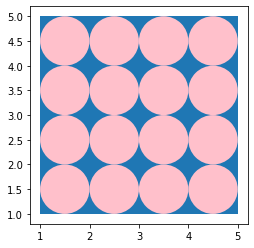

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle
import math

square = Polygon([(1, 1), (5, 1), (5, 5), (1, 5)], closed = True)



fig = plt.figure()
ax = fig.add_subplot()
ax.add_patch(square)
y = 1.5
while y < 5:
    x = 1.5
    while x < 5:
        c = Circle((x, y), radius=0.5, fc='pink')
        ax.add_patch(c)
        x += 1.0
    y += 1.0

ax.set_aspect('equal')
ax.axis('scaled')
plt.show()

# シェルピンスキーの三角形



In [ ]:
シェルピンスキーの三角形はパーンズリーのシダのプログラムとそっくりで、transformation の式と、確率の式が違うだけである。

Transformation 1:  
$x_{n+1} = 0.5x_n$  
$y_{n+1} = 0.5y_n$  

Transformation 2:  
$x_{n+1} = 0.5x_n + 0.5$  
$y_{n+1} = 0.5y_n + 0.5$  

Transformation 3:  
$x_{n+1} = 0.5x_n + 1$  
$y_{n+1} = 0.5y_n$  

シェルピンスキーの三角形はパーンズリーのシダのプログラムとそっくりで、transformation の式と、確率の式が違うだけである。

Transformation 1:  
$x_{n+1} = 0.5x_n$  
$y_{n+1} = 0.5y_n$  

Transformation 2:  
$x_{n+1} = 0.5x_n + 0.5$  
$y_{n+1} = 0.5y_n + 0.5$  

Transformation 3:  
$x_{n+1} = 0.5x_n + 1$  
$y_{n+1} = 0.5y_n$  

確率は $1/3$ の等分。

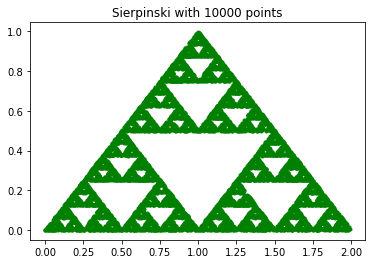

In [ ]:
# Sierpinski Triangle

import matplotlib.pyplot as plt
import random
from fractions import Fraction


def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x
    y1 = 0.5*y
    return x1, y1


def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x + 0.5
    y1 = 0.5*y + 0.5
    return x1, y1


def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x + 1.0
    y1 = 0.5*y
    return x1, y1


def transformation_4(p):
    x = p[0]
    y = p[1]
    x1 = 0
    y1 = 0.16*y
    return x1, y1


def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability) - 1


def transform(p):
    transformations = [transformation_1, transformation_2, transformation_3]
    probability = [Fraction(1, 3), Fraction(1, 3), Fraction(1, 3)]
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y


n = 10000  # number of points
x = [0]
y = [0]
x1, y1 = 0, 0
for i in range(n):
    x1, y1 = transform((x1, y1))
    x.append(x1)
    y.append(y1)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y, 'og', markersize=3)
ax.set_title('Sierpinski with {0} points'.format(n))
plt.show()


# エノンの関数 Henon function

In [3]:
import matplotlib.pyplot as plt
from matplotlib import animation

def transform1(p):
    x,y  = p
    x1 = y + 1.0 - 1.4*x**2
    y1 = 0.3*x

    return x1, y1

def update_points(i, x, y, plot):
    plot.set_data(x[:i], y[:i])
    return plot
    

p = (0, 0)
x = [p[0]]
y = [p[1]]
n = 100
for i in range(n):
    p = transform1(p)
    x.append(p[0])
    y.append(p[1])

fig = plt.gcf()
ax = plt.axes(xlim = (min(x), max(x)), ylim = (min(y), max(y)))
plot, = ax.plot([], [], 'o')
anim = animation.FuncAnimation(fig, update_points, fargs=(x, y, plot), frames = len(x), interval = 25, blit = True)
plt.title('Henon function')
plt.close()
from IPython.display import HTML
HTML(anim.to_jshtml())


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1772, in _draw_frame
    key=lambda x: x.get_zorder())
TypeError: 'Line2D' object is not iterable


TypeError: ignored

# p. 170